In [61]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("smsspamcollection.csv", header=None, names=["class", "content"])
df.head(10)

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [27]:
# Convert class to numerical variables
df['class'] = df['class'].map({'spam': 1, 'ham': 0})
df.head(10)

,class,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [28]:
X = df['content']
y = df['class']


In [32]:
# Split dataset to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [40]:
# Build Bag of words and vectorizing
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(stop_words='english')

vector.fit(X_train)

X_train_transform = vector.transform(X_train)
X_test_transform = vector.transform(X_test)

In [51]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# Fit model with train dataset
mnb = mnb.fit(X_train_transform, y_train)

# Do prediction
mnb_predict = mnb.predict(X_test_transform)

# Test dataset
mnb_prob = mnb.predict_proba(X_test_transform)

print(mnb_prob)

[[9.95239557e-01 4.76044325e-03]
 [9.99852357e-01 1.47642544e-04]
 [9.27878579e-01 7.21214213e-02]
 ...
 [9.99999671e-01 3.28799076e-07]
 [3.72703622e-09 9.99999996e-01]
 [9.99999985e-01 1.46852511e-08]]


In [46]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

# Fit model with train dataset
bnb = bnb.fit(X_train_transform, y_train)


bnb_predict = bnb.predict(X_test_transform)

# Test dataset
bnb_prob = bnb.predict_proba(X_test_transform)

print(bnb_prob)

[[1.00000000e+00 1.54647985e-10]
 [1.00000000e+00 1.69177313e-10]
 [9.99999997e-01 2.52488636e-09]
 ...
 [9.99994219e-01 5.78141360e-06]
 [3.64570741e-06 9.99996354e-01]
 [1.00000000e+00 2.90374743e-12]]


## Model Evaluation

In [55]:
from sklearn import metrics

mnb_accuracy_score = metrics.accuracy_score(y_test, mnb_predict)

bnb_accuracy_score = metrics.accuracy_score(y_test, bnb_predict)


print(f"\nMNB Accuracy: {mnb_accuracy_score}")

print(f"\nBNB Accuracy: {bnb_accuracy_score}")


MNB Accuracy: 0.9877961234745154

BNB Accuracy: 0.9770279971284996


In [60]:
mnb_confusion_matrix = metrics.confusion_matrix(y_test, mnb_predict)
bnb_confusion_matrix = metrics.confusion_matrix(y_test, bnb_predict)

print(f"\nMNB Confusion Matrix:\n {mnb_confusion_matrix}")

print(f"\nBNB Confusion Matrix:\n {bnb_confusion_matrix}")


MNB Confusion Matrix:
 [[1201    7]
 [  10  175]]

BNB Confusion Matrix:
 [[1207    1]
 [  31  154]]


In [63]:
def evaluate_model(y_test: np.array, y_predict: np.array):

    from sklearn import metrics

    confusion_matrix = metrics.confusion_matrix(y_test, y_predict)


    # Get values
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    TP = confusion_matrix[1, 1]


    sensitivity = TP / float(FN + TP)
    print("sensitivity",sensitivity)

    specificity = TN / float(TN + FP)
    print("specificity",specificity)

    precision = TP / float(TP + FP)
    print("precision",precision)

    print("PRECISION SCORE :",metrics.precision_score(y_test, y_predict))
    print("RECALL SCORE :", metrics.recall_score(y_test, y_predict))
    print("F1 SCORE :",metrics.f1_score(y_test, y_predict))



In [64]:
# Evaluate MNB model
evaluate_model(y_test=y_test, y_predict=mnb_predict)

sensitivity 0.9459459459459459
specificity 0.9942052980132451
precision 0.9615384615384616
PRECISION SCORE : 0.9615384615384616
RECALL SCORE : 0.9459459459459459
F1 SCORE : 0.9536784741144414


In [65]:
# Evaluate BNB model
evaluate_model(y_test=y_test, y_predict=bnb_predict)

sensitivity 0.8324324324324325
specificity 0.9991721854304636
precision 0.9935483870967742
PRECISION SCORE : 0.9935483870967742
RECALL SCORE : 0.8324324324324325
F1 SCORE : 0.9058823529411765


In [70]:
def create_roc_curve(y_test: np.array, y_predict_prob: np.array):

    # creating an ROC curve
    import pandas as pd
    from sklearn.metrics import confusion_matrix as sk_confusion_matrix
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print(f"\nroc_auc: {roc_auc}")

    matrix_threshold = pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })
    
    print(f"\nmatrix_threshold: \n {matrix_threshold}")


    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate)

    plt.show()
    



roc_auc: 0.9921872203329157

matrix_threshold: 
         Threshold       TPR       FPR
0             inf  0.000000  0.000000
1    1.000000e+00  0.308108  0.000000
2    1.000000e+00  0.313514  0.000000
3    1.000000e+00  0.335135  0.000000
4    1.000000e+00  0.340541  0.000000
..            ...       ...       ...
105  6.325596e-13  1.000000  0.959437
106  6.086604e-13  1.000000  0.961093
107  4.174215e-14  1.000000  0.970199
108  3.968331e-14  1.000000  0.972682
109  6.227131e-41  1.000000  1.000000

[110 rows x 3 columns]


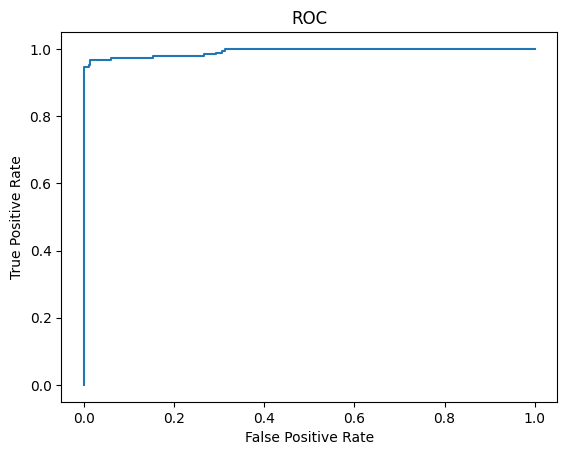

In [71]:
# Calculate ROC curse for MNB model
create_roc_curve(y_test=y_test, y_predict_prob=mnb_prob)


roc_auc: 0.9967692858421334

matrix_threshold: 
         Threshold       TPR       FPR
0             inf  0.000000  0.000000
1    1.000000e+00  0.254054  0.000000
2    1.000000e+00  0.286486  0.000000
3    1.000000e+00  0.297297  0.000000
4    1.000000e+00  0.302703  0.000000
..            ...       ...       ...
101  3.481678e-13  1.000000  0.932119
102  3.468137e-13  1.000000  0.933775
103  3.256825e-13  1.000000  0.935430
104  3.248228e-13  1.000000  0.937086
105  5.938675e-17  1.000000  1.000000

[106 rows x 3 columns]


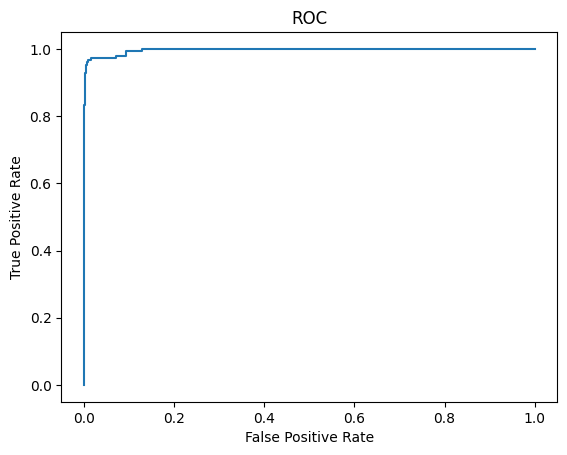

In [72]:
# Calculate ROC curse for BNB model
create_roc_curve(y_test=y_test, y_predict_prob=bnb_prob)